In [2]:
import scipy as sc
from scipy.io import arff
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import cluster
import time
import kmedoids
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
import scipy.cluster.hierarchy as shc
import hdbscan
from sklearn.neighbors import NearestNeighbors


# Data loading

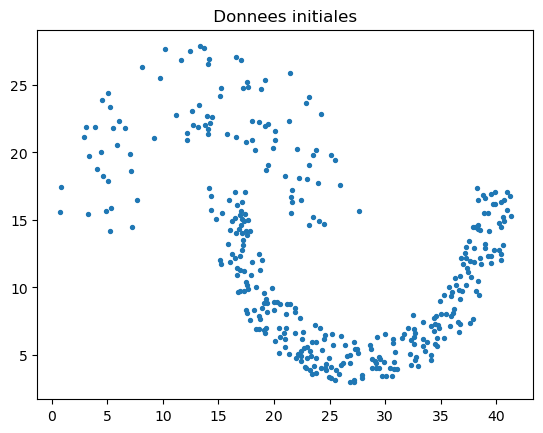

In [111]:
# Parser un fichier de donnees au format arff
# data est un tableau d’exemples avec pour chacun
# la liste des valeurs des features
#
# Dans les jeux de donnees consideres :
# il y a 2 features ( dimension 2)
# Ex : [[ -0.499261 , -0. 0612356 ] ,
# [ -1.51369 , 0. 265446 ] ,
# [ -1.60321 , 0. 362039 ] , .....
# ]
#
# Note : chaque exemple du jeu de donnees contient aussi un
# numero de cluster . On retire cette information
path = './artificial/'

#on utilise xclara.arff, diamond9, pmf
databrut = arff.loadarff(open(path + "jain.arff", 'r'))
datanp = [[x[0],x[1]] for x in databrut[0]]
datanp = np.array(datanp)
# Affichage en 2D
# Extraire chaque valeur de features pour en faire une liste
# Ex pour f0 = [ -0.499261 , -1.51369 , -1.60321 , ...]
# Ex pour f1 = [ -0. 0612356 , 0.265446 , 0.362039 , ...]
f0 = datanp[:,0] # tous les elements de la premiere colonne
f1 = datanp[:,1] # tous les elements de la deuxieme colonne
plt.scatter( f0 , f1 , s=8 )
plt.title(" Donnees initiales ")
plt.show()

# Kmeans 

Appel KMeans pour une valeur fixee de k


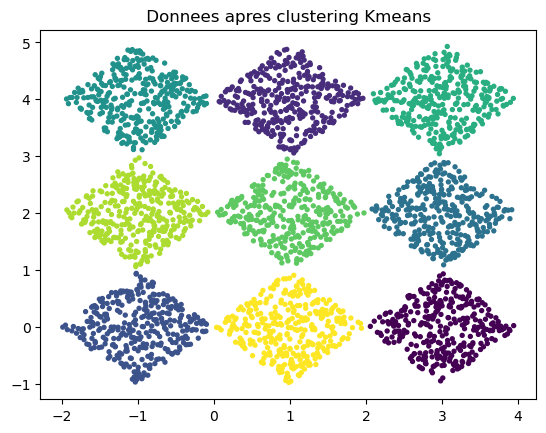

nb clusters = 9, nb iter =4, ...... runtime =  250.97 ms


In [34]:
print("Appel KMeans pour une valeur fixee de k")
tps1 = time.time ()
k=9
model = cluster.KMeans(n_clusters=k, init ='k-means++')
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.scatter(f0,f1,c=labels,s=8)
plt.title(" Donnees apres clustering Kmeans ")
plt.show()
print("nb clusters = "+str(k)+", nb iter ="+ str(iteration)+ ", ...... runtime = ", round (( tps2 - tps1 )*1000 , 2 ) ,"ms")


In [4]:
def number_of_cluster(max_number_of_cluster, data):
    calinski = []
    for k in range(2, max_number_of_cluster+1):
        model = cluster.KMeans(n_clusters=k, init ='k-means++')
        model.fit(data)
        labels = model.labels_
        current_cal = sk.metrics.calinski_harabasz_score(data,labels)
        calinski.insert(k, current_cal)
    return calinski.index(max(calinski))+2

number_of_cluster(10, datanp)

c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_

10

c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_

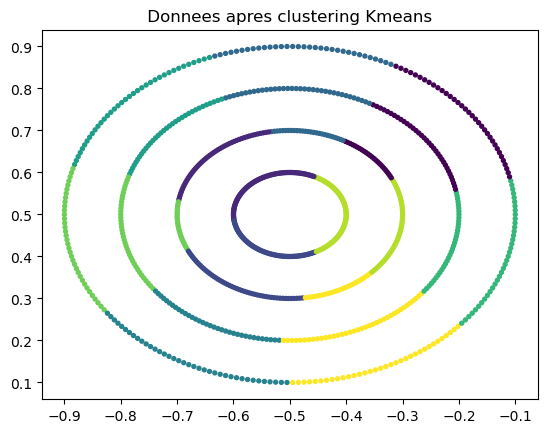

nb clusters = 10, nb iter =17, ...... runtime =  2568.39 ms


In [5]:
tps1 = time.time ()
k=number_of_cluster(10,datanp)
model = cluster.KMeans(n_clusters=k, init ='k-means++')
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.scatter(f0,f1,c=labels,s=8)
plt.title(" Donnees apres clustering Kmeans ")
plt.show()
print("nb clusters = "+str(k)+", nb iter ="+ str(iteration)+ ", ...... runtime = ", round (( tps2 - tps1 )*1000 , 2 ) ,"ms")

When we automatically find the number of cluster, it is longer because we need to do many iterations of the method fit before finding the best cluster.

Le résultat attendu est obtenu avec ces métriques. Cependant, c'est en grande partie en raison des exemples que nous avons sélectionné qui fonctionnent bien avec la méthode kmean. Si on choisi un moins bon exemple, on obtient : 

c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_

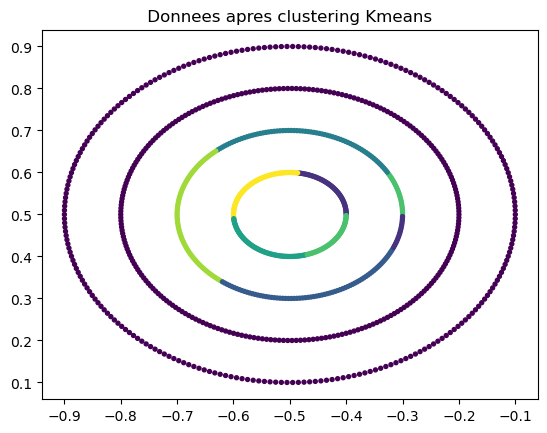

nb clusters = 8, nb iter =5, ...... runtime =  2134.27 ms


In [6]:
#donut is not a good exemple for kmeans 
databrut = arff.loadarff(open(path + "donut1.arff", 'r'))
datanp = [[x[0],x[1]] for x in databrut[0]]
datanp = np.array(datanp)

tps1 = time.time ()
k=number_of_cluster(8,datanp)
model = cluster.KMeans(n_clusters=k, init ='k-means++')
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.scatter(f0,f1,c=labels,s=8)
plt.title(" Donnees apres clustering Kmeans ")
plt.show()
print("nb clusters = "+str(k)+", nb iter ="+ str(iteration)+ ", ...... runtime = ", round (( tps2 - tps1 )*1000 , 2 ) ,"ms")


c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


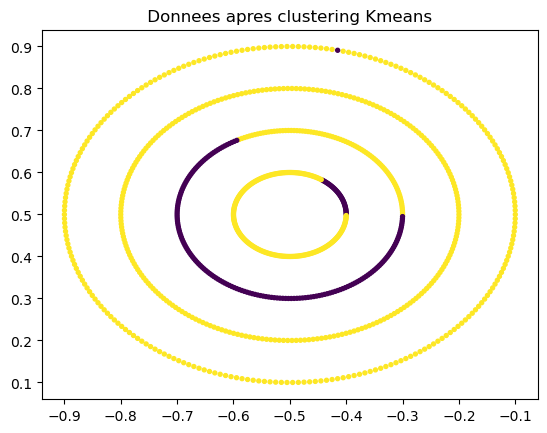

nb clusters = 2, nb iter =4, ...... runtime =  274.54 ms


In [7]:
tps1 = time.time ()
k=2
model = cluster.KMeans(n_clusters=k, init ='k-means++')
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.scatter(f0,f1,c=labels,s=8)
plt.title(" Donnees apres clustering Kmeans ")
plt.show()
print("nb clusters = "+str(k)+", nb iter ="+ str(iteration)+ ", ...... runtime = ", round (( tps2 - tps1 )*1000 , 2 ) ,"ms")


We can see that the clusters are still not good

c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_

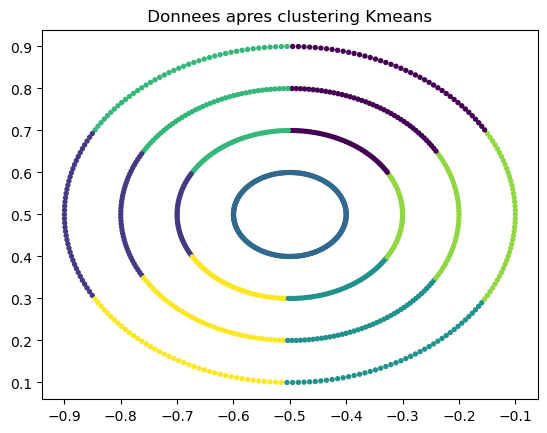

nb clusters = 7, nb iter =19, ...... runtime =  2144.48 ms


In [8]:
#dartboard1 is either not a good exemple for kmeans 
databrut = arff.loadarff(open(path + "dartboard1.arff", 'r'))
datanp = [[x[0],x[1]] for x in databrut[0]]
datanp = np.array(datanp)

tps1 = time.time ()
k=number_of_cluster(8,datanp)
model = cluster.KMeans(n_clusters=k, init ='k-means++')
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.scatter(f0,f1,c=labels,s=8)
plt.title(" Donnees apres clustering Kmeans ")
plt.show()
print("nb clusters = "+str(k)+", nb iter ="+ str(iteration)+ ", ...... runtime = ", round (( tps2 - tps1 )*1000 , 2 ) ,"ms")


c:\Users\delam\anaconda3\envs\tp-clustering\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


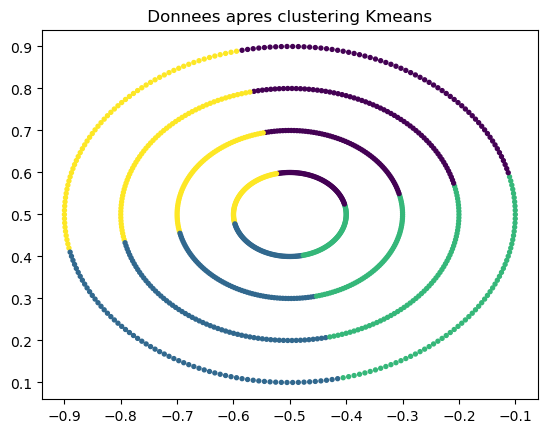

nb clusters = 4, nb iter =12, ...... runtime =  271.48 ms


In [9]:
tps1 = time.time ()
k=4
model = cluster.KMeans(n_clusters=k, init ='k-means++')
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.scatter(f0,f1,c=labels,s=8)
plt.title(" Donnees apres clustering Kmeans ")
plt.show()
print("nb clusters = "+str(k)+", nb iter ="+ str(iteration)+ ", ...... runtime = ", round (( tps2 - tps1 )*1000 , 2 ) ,"ms")


Even with the visble number of cluster the cluster are still bad

# Kmedoid

[1172 2496 2182 1822  825  502 1472 2843  179]
Loss with FasterPAM : 1643.9630784186443


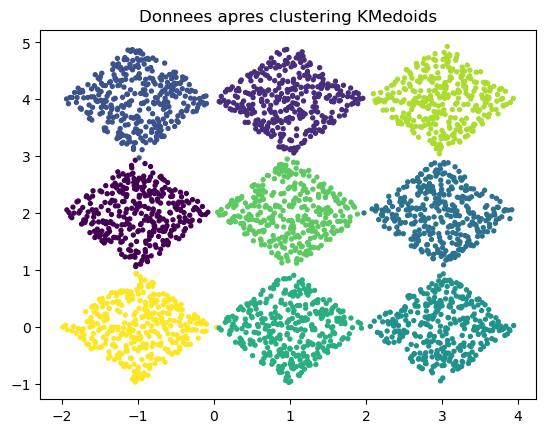

nb clusters = 9 , nb iter = 2 , ...... runtime =  160.89 ms
similarity:  0.9995560742469712


In [35]:
tps1 = time.time ()
k=9
distmatrix = euclidean_distances(datanp)
fp = kmedoids.fasterpam(distmatrix, k)
tps2 = time.time()
iter_kmed = fp.n_iter
labels_kmed = fp.labels
print(fp.medoids)
print ("Loss with FasterPAM :", fp.loss )
plt.scatter(f0, f1, c=labels_kmed, s=8)
plt.title("Donnees apres clustering KMedoids")
plt.show()
print ("nb clusters =",k ,", nb iter =", iter_kmed , ", ...... runtime = ", round (( tps2 - tps1 )*1000 , 2 ) ,"ms")
print("similarity: ", sk.metrics.rand_score(labels, labels_kmed))

on trouve le bon nombre de cluster avec la méthode pour trouver le nombre de cluster. La plus grande partie du temps d'exécution vient du calcul du bon nombre de cluster.

on trouve le même clustering que avec kmean car l'exemple pmf est un bon exemple pour kmedoid et kmeans

We find the rand_score equals to 1 it means that the two clustering are exactly the same. It is probably due to the exemple being a perfect fit for the example pmf

On obtient le même résultat avec l'exemple xclara. Les deux clustering sont identiques

Avec l'exemple diamond 9 les clustering kmeans et kmedoids sont un peu différents mais restent similaires (rand_score = 0.84)

Loss with euclidian distances : 365.48312542427203
Loss with manhattan distances : 466.3274849999996


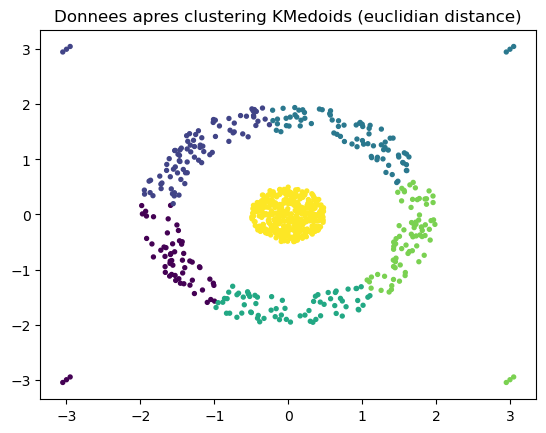

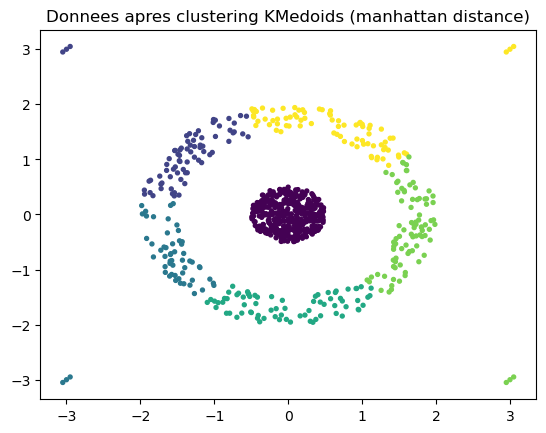

similarity:  0.9995560742469712


In [44]:
k=6
distmatrix = euclidean_distances(datanp)
fp_eucl = kmedoids.fasterpam(distmatrix, k)
labels_kmed_eucl = fp_eucl.labels
distmatrix = manhattan_distances(datanp)
fp_man = kmedoids.fasterpam(distmatrix, k)
labels_kmed_man = fp_man.labels
print ("Loss with euclidian distances :", fp_eucl.loss )
print ("Loss with manhattan distances :", fp_man.loss )
plt.scatter(f0, f1, c=labels_kmed_eucl, s=8)
plt.title("Donnees apres clustering KMedoids (euclidian distance)")
plt.show()
plt.scatter(f0, f1, c=labels_kmed_man, s=8)
plt.title("Donnees apres clustering KMedoids (manhattan distance)")
plt.show()
print("similarity: ", sk.metrics.rand_score(labels, labels_kmed))

Avec un exemple comme diamond9 le clustering avec les 2 distances est très proche

Avec un exemple plus compliqué comme sizes1 avec 4 clusters la distance n'a pas beaucoup d'effet non plus sur le clustering

Enfin, pour un exemple mal adapté comme target, on peut voir que les deux clusterings (avec les 2 distances) sont encore très proches (rand_score proche de 1). Cependant il ne s'agit pas du bon clustering

# Clustering agglomeratif

 Dendrogramme 'single' donnees initiales 


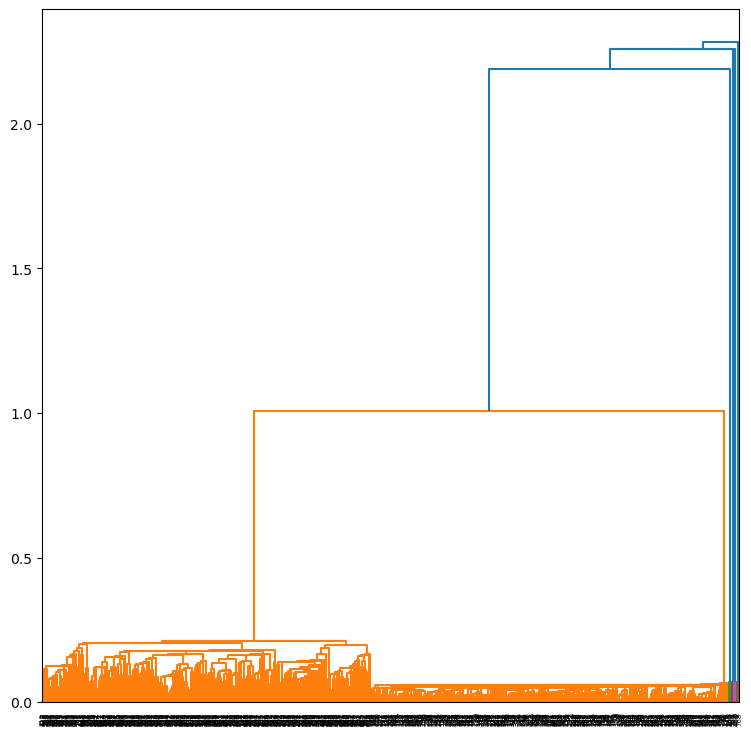

In [50]:
# Donnees dans datanp
print (" Dendrogramme 'single' donnees initiales ")
linked_mat = shc.linkage(datanp, 'single')
plt.figure(figsize=( 9 , 9 ))
shc.dendrogram(linked_mat, orientation ='top',distance_sort ='descending', show_leaf_counts = False)
plt.show()


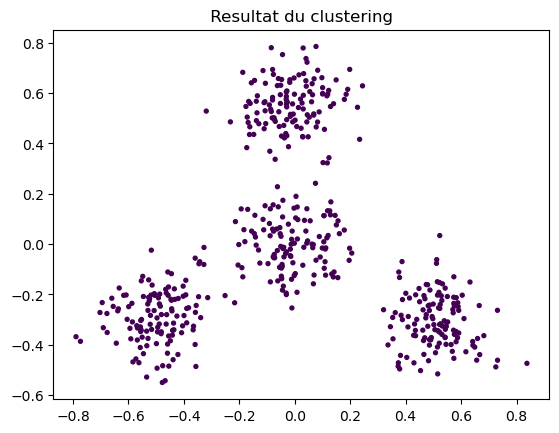

nb clusters = 1 , nb feuilles =  500  runtime =  2.93 ms


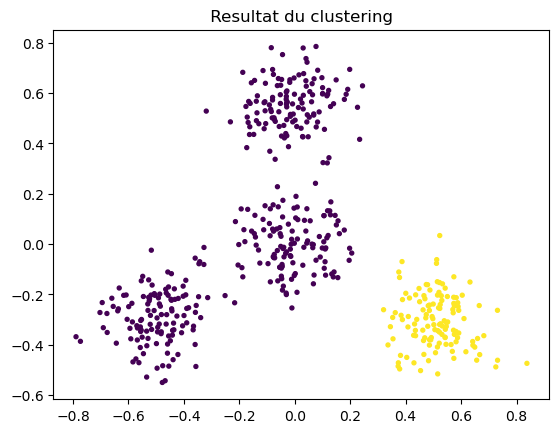

nb clusters = 2 , nb feuilles =  500  runtime =  2.0 ms


In [95]:
# set distance_threshold (0 ensures we compute the full tree )
tps1 = time.time ()
model = cluster.AgglomerativeClustering (distance_threshold =1 , linkage ='single', n_clusters = None)
model = model.fit(datanp)
tps2 = time.time()
labels = model.labels_
k = model.n_clusters_
leaves = model.n_leaves_
# Affichage clustering
plt.scatter (f0, f1 , c=labels , s=8)
plt.title (" Resultat du clustering ")
plt.show()
print("nb clusters =",k ,", nb feuilles = ", leaves," runtime = ", round (( tps2 - tps1 )*1000 , 2 ) ,"ms")


# set the number of clusters
k=2
tps1 = time . time ()
model = cluster.AgglomerativeClustering (linkage ='single', n_clusters =k)
model = model.fit(datanp)
tps2 = time.time ()
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_
# Affichage clustering
plt.scatter (f0, f1 , c=labels , s=8)
plt.title (" Resultat du clustering ")
plt.show()
print("nb clusters =",k ,", nb feuilles = ", leaves," runtime = ", round (( tps2 - tps1 )*1000 , 2 ) ,"ms")

les exemples qui fonctionnent bien sont target, smile1 et spiral (si on donne la bonne distance threshold cad assez proche de la distance minimum entre 2 clusters ou directement le bon nombre de cluster). Les exemples avec du bruit en revanche ne fonctionnent pas avec cette méhtode (par exemple xclara)

In [66]:
def launch_agglomerative_clustering(data, linkage='single', n_cluster=None, dist = None):
    tps1 = time.time ()
    model = cluster.AgglomerativeClustering (distance_threshold =dist , linkage =linkage, n_clusters = n_cluster)
    model = model.fit(data)
    tps2 = time.time()
    labels = model.labels_
    k = model.n_clusters_
    leaves = model.n_leaves_
    plt.scatter (f0, f1 , c=labels , s=8)
    plt.title (" Resultat du clustering ")
    plt.show()
    return  round (( tps2 - tps1 )*1000 , 2 ), sk.metrics.calinski_harabasz_score(data, labels), k 

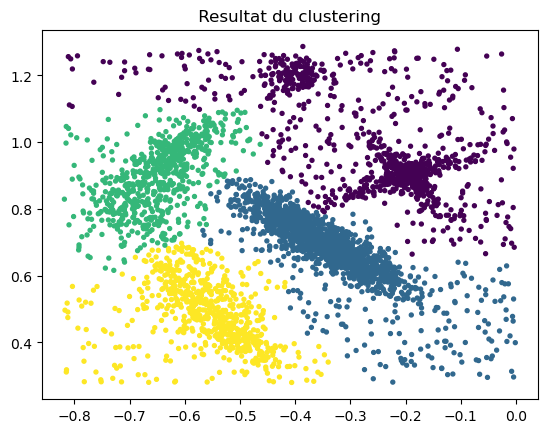

Calinski score (ward) :  2973.554110441648
time ward :  259.45


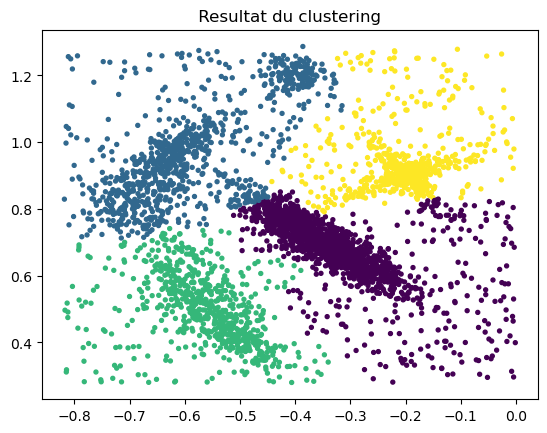

Calinski score (complete) :  3122.5732184576077
time complete :  250.48


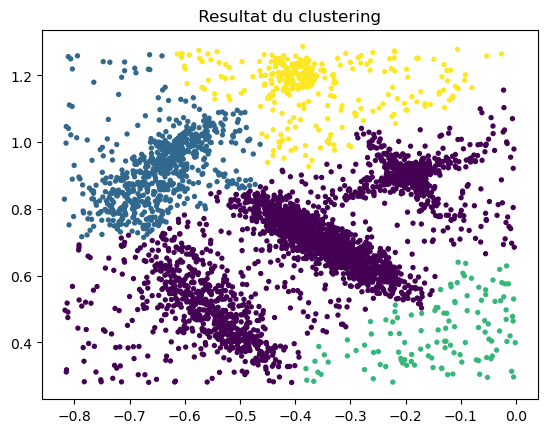

Calinski score (average) :  1316.7488679795076
time avg :  225.32


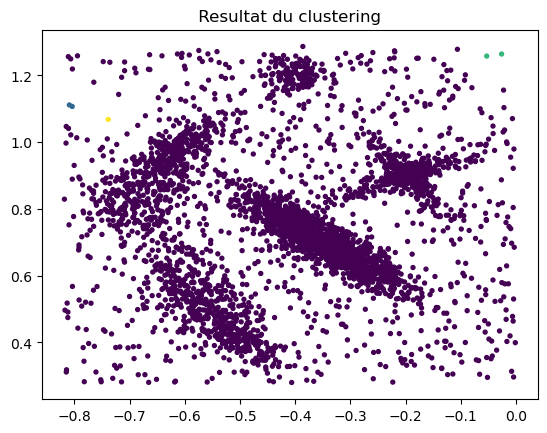

Calinski score (single) :  6.9111302956546385
time single :  82.01


In [116]:
k=4
#test with ward
t_ward, perf_ward, _ = launch_agglomerative_clustering(datanp, linkage = "ward", n_cluster = k)
print("Calinski score (ward) : ", perf_ward)
print("time ward : ", t_ward)

#test with complete
t_complete, perf_complete, _ = launch_agglomerative_clustering(datanp, linkage = "complete", n_cluster = k)
print("Calinski score (complete) : ", perf_complete)
print("time complete : ", t_complete)

#test with average
t_avg, perf_avg, _ = launch_agglomerative_clustering(datanp, linkage = "average", n_cluster = k)
print("Calinski score (average) : ", perf_avg)
print("time avg : ", t_avg)

#test with single
t_single, perf_single, _ = launch_agglomerative_clustering(datanp, linkage = "single", n_cluster = k)
print("Calinski score (single) : ", perf_single)
print("time single : ", t_single)

Nous obtenons différents cluster en fonction des différentes méthodes de linkage. Le score calinski n'est pas nécessairement une bonne métric d'évaluation pour estimer la qualité du cluster. En effet, avec l'exemple spiral la meilleure méthode de linkage semble être single mais possède le plus faible score calinski. 

Pour l'exemple xclara, toutes les méthodes de linkage donnent des résultats de cluster asser proches (score calinski prochent) excepter pour la méthode single qui donne un mauvais clustering parce que chaque cluster fusionne à chaque itération avec le point le plus proche du cluster rendant cette méthode sensible au bruit et au point qu'il y a alors entre les clusters. La méthode la plus rapide sur l'exemple xclara est la méthode single, puis la méthode average

Quand on change le nombre de cluster imposé, on obtient différentes répartitions selon la méthode de linkage résultant à des scores de calinski variables pour chaque méthode.

Les exemples qui ne donne pas un bon résultat avec la méthode de clustering agglomeratif sont jain, rings et dbp. La raison principale est du au fait que les exemples sont bruités il y des point anormaux qui sont ajoutés dans des clusters. Pour ces exemples, les clusters devraient se former en ayant pour objectif de suivre les point formant une sorte de "chemin" et maximisant la concentration de nombre de point par unité de surface. Cependant, avec les exemples qui fonctionnent moins bien le changement de la méthode de linkage (en particulier utiliser autre chose que la méthode single) peut permettre d'obtenir de meilleur résultats

Chacune des 3 méthodes fouriront un bon clustering pour des exemples différents. Par exemple, pour un exemple sans bruit dans les données la méthode agglomeratif single linkage founrinira un bon résultat. Pour un exemple, avec du bruit et des points regroupés en ensembles convexes les méthodes kmeans et kmedoids seront plus efficaces. De son côté la méthode k-medoid est moins sensible au bruit que kmean car ne présente pas de calcul de moyenne. Pour un exemple comme spiral en revanche, où les clusters ont une forme particulière la méthode de clustering agglomeratif avec single linkage fournie le meilleur résultat (comparé a kmean et kmedoid).
Chacune des méthodes peut être paramétrées en choisissant le calcul de mesure de distance pour kmean et kmedoid ou en choisissant la méthode de linkage pour clustering agglomératif. 

# DBSCAN

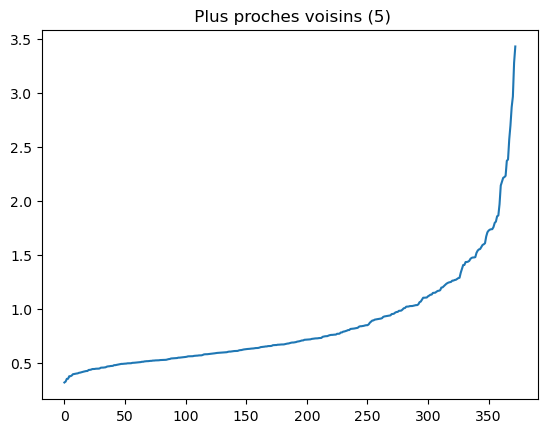

In [113]:
# Distances k plus proches voisins
# Donnees dans X
X = datanp
k=5
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit (X)
distances,indices = neigh.kneighbors(X)
# retirer le point " origine "
newDistances = np.asarray ([np.average(distances[i][1:]) for i in range (0, distances.shape[0])])
trie = np.sort(newDistances)
plt.title(" Plus proches voisins (5)")
plt.plot(trie)
plt.show ()


Appel DBSCAN pour une valeur fixee de eps and min sample


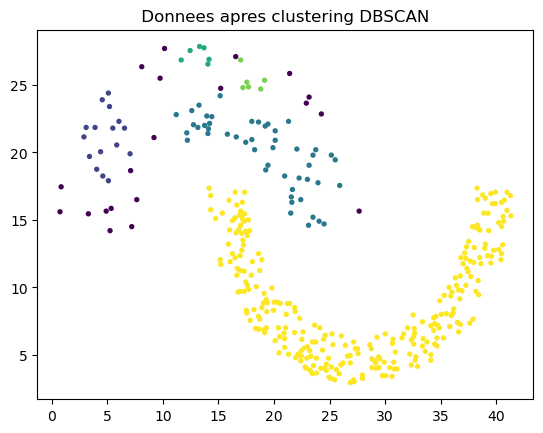

2
runtime =  4.0 ms Calinski score:  70.4528011159798


In [115]:
print("Appel DBSCAN pour une valeur fixee de eps and min sample" )
tps1 = time.time ()
model = cluster.DBSCAN(eps=2, min_samples=5)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
n_cluster = model.n_features_in_
plt.scatter(f0,f1,c=labels,s=8)
plt.title(" Donnees apres clustering DBSCAN ")
plt.show()
print(n_cluster)
print("runtime = ", round (( tps2 - tps1 )*1000 , 2 ) ,"ms Calinski score: ",sk.metrics.calinski_harabasz_score(datanp, labels) )

L'exemple spiral.arff fonctionne bien avec la méthode DBSCAN avec les paramètres eps=0.25 et min_sample=5 car les clusters se répartissent entre eux par la densité des points dans chaque cluster et il n'y a pas de bruit inter cluster. Les exemples tetra.arff, simplex.arff et jain.arff fonctionnent moins bien car ce sont des exemples avec du bruit et avec densité variable.

# HDBSCAN

Appel HDBSCAN pour une valeur fixee de min cluster size et de min sample


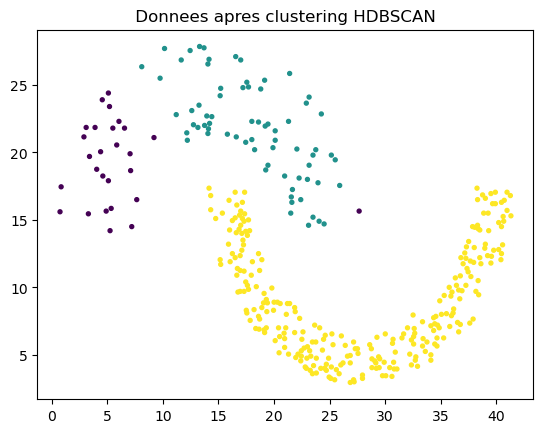

runtime =  11.0 ms, Calinski score:  176.84663520647962


In [123]:
print("Appel HDBSCAN pour une valeur fixee de min cluster size et de min sample" )
tps1 = time.time ()
model = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=2)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
plt.scatter(f0,f1,c=labels,s=8)
plt.title(" Donnees apres clustering HDBSCAN ")
plt.show()
print("runtime = ", round (( tps2 - tps1 )*1000 , 2 ) ,"ms, Calinski score: ",sk.metrics.calinski_harabasz_score(datanp, labels) )

Avec l'exemple simplex.arff (min_cluster_size=50, min_samples=2) la méthode HDBSCAN permet d'avoir un meilleur score Calinski que avec DBSCAN car cette méthode semble moins sensible aux variations de densité. Cependant le clustering ne reste pas perfait car certains points excentrés par rapport au centre des clusters sont toujours considérés comme appartenant à un cluster différent.

L'exemple tetra.arff avec la méthode HDBSCAN (min_cluster_size=35, min_samples=2) semble aussi donner un meilleur score Calinski que avec la méthodes DBSCAN. Cependant le clustering reste très imparfait puisqu'il y a beaucoup de bruit dans les données. Le fait d'augmenter la taille minimum d'un cluster permet d'éviter d'avoir des cluster trop petits correpondant à un cluster avec des données bruitées.

Pour l'exemple jain.arff la méthode HDBSCAN donne un bien meilleur clustering que la méthode DBSCAN car il s'agissait d'un problème de densité variable pour la méhtode DBSCAN mais qui n'est pas pris en compte pour la méthode HDBSCAN.

Pour ce qui est du temps d'exécution la méthode HDBSCAN est environ 2 fois plus longue que la méthode DBSCAN. Mais les résulats obtenus sont globalement meilleur avec la méthode HDBSCAN car elle permet de résoudre le problème de densité variable dans les données. 

Pour les 2 méthodes en revanche choisir les bons paramètres pour obtenir le meilleur clustering possible n'est pas évident car nous pouvons avoir une intuition sur la manière de faire varier les paramètres mais nous ne serons jamais sûr que le clustering obtenu est le meilleur possible. 